# 수도권, 비수도권 집값 평균 그래프

## APARTMENT_AVG_PRICE_CATEGORY_MONTHLY 테이블 사용

### db 접근

### 테이블 가져오기

In [ ]:
import matplotlib.pyplot as plt
import pymysql
import pandas as pd
import plotly.express as px
import koreanize_matplotlib

# 수도권, 비수도권 아파트 평균 매매 가격 테이블
sql_query_category = """
SELECT * FROM APARTMENT_AVG_PRICE_CATEGORY_MONTHLY;
"""

cur.execute(sql_query_category)
result = cur.fetchall()

category_df = pd.DataFrame(result)
category_df.columns = [desc[0] for desc in cur.description]

In [ ]:
category_df.head(10)

,YEAR,MONTH,CATEGORY,PRICE
0,2014,1,수도권,336244000
1,2014,2,수도권,337285000
2,2014,3,수도권,338751000
3,2014,4,수도권,338822000
4,2014,5,수도권,338573000
5,2014,6,수도권,338393000
6,2014,7,수도권,338403000
7,2014,8,수도권,338864000
8,2014,9,수도권,340449000
9,2014,10,수도권,341834000


### 수도권 아파트 평균만 가져와서 df 생성

In [ ]:
capital_df = category_df.loc[category_df['CATEGORY'] == '수도권'].reset_index(drop=True)
capital_df

,YEAR,MONTH,CATEGORY,PRICE
0,2014,1,수도권,336244000
1,2014,2,수도권,337285000
2,2014,3,수도권,338751000
3,2014,4,수도권,338822000
4,2014,5,수도권,338573000
...,...,...,...,...
123,2024,4,수도권,664664000
124,2024,5,수도권,665731000
125,2024,6,수도권,669144000
126,2024,7,수도권,676207000


### 지방권 아파트 평균만 가져와서 df 생성

In [ ]:
non_capital_df = category_df.loc[category_df['CATEGORY'] == '지방권'].reset_index(drop=True)
non_capital_df

,YEAR,MONTH,CATEGORY,PRICE
0,2014,1,지방권,168065000
1,2014,2,지방권,168487000
2,2014,3,지방권,168846000
3,2014,4,지방권,169182000
4,2014,5,지방권,169429000
...,...,...,...,...
123,2024,4,지방권,256520000
124,2024,5,지방권,256231000
125,2024,6,지방권,255802000
126,2024,7,지방권,255450000


### 각 날짜별 매매가격 변화량 측정

In [ ]:
# PRICE 변화량 계산
capital_df['CHANGE_PRICE'] = capital_df['PRICE'].diff().fillna(0)

# 첫 번째 행의 CHANGE_PRICE를 0으로 설정 (이미 .diff()에서 첫 번째 값은 NaN -> 0으로 처리됨)
capital_df.loc[0, 'CHANGE_PRICE'] = 0  # loc를 사용하여 설정

# 결과 확인
capital_df

,YEAR,MONTH,CATEGORY,PRICE,CHANGE_PRICE
0,2014,1,수도권,336244000,0.0
1,2014,2,수도권,337285000,1041000.0
2,2014,3,수도권,338751000,1466000.0
3,2014,4,수도권,338822000,71000.0
4,2014,5,수도권,338573000,-249000.0
...,...,...,...,...,...
123,2024,4,수도권,664664000,616000.0
124,2024,5,수도권,665731000,1067000.0
125,2024,6,수도권,669144000,3413000.0
126,2024,7,수도권,676207000,7063000.0


In [ ]:
# PRICE 변화량 계산
non_capital_df['CHANGE_PRICE'] = non_capital_df['PRICE'].diff().fillna(0)

# 첫 번째 행의 CHANGE_PRICE를 0으로 설정 (이미 .diff()에서 첫 번째 값은 NaN -> 0으로 처리됨)
non_capital_df.loc[0, 'CHANGE_PRICE'] = 0  # loc를 사용하여 설정

# 결과 확인
non_capital_df

,YEAR,MONTH,CATEGORY,PRICE,CHANGE_PRICE
0,2014,1,지방권,168065000,0.0
1,2014,2,지방권,168487000,422000.0
2,2014,3,지방권,168846000,359000.0
3,2014,4,지방권,169182000,336000.0
4,2014,5,지방권,169429000,247000.0
...,...,...,...,...,...
123,2024,4,지방권,256520000,-423000.0
124,2024,5,지방권,256231000,-289000.0
125,2024,6,지방권,255802000,-429000.0
126,2024,7,지방권,255450000,-352000.0


In [ ]:
non_capital_df.head()

,YEAR,MONTH,CATEGORY,PRICE,CHANGE_PRICE
0,2014,1,지방권,168065000,0.0
1,2014,2,지방권,168487000,422000.0
2,2014,3,지방권,168846000,359000.0
3,2014,4,지방권,169182000,336000.0
4,2014,5,지방권,169429000,247000.0


### 수도권과 지방권 집값 평균 비교하기

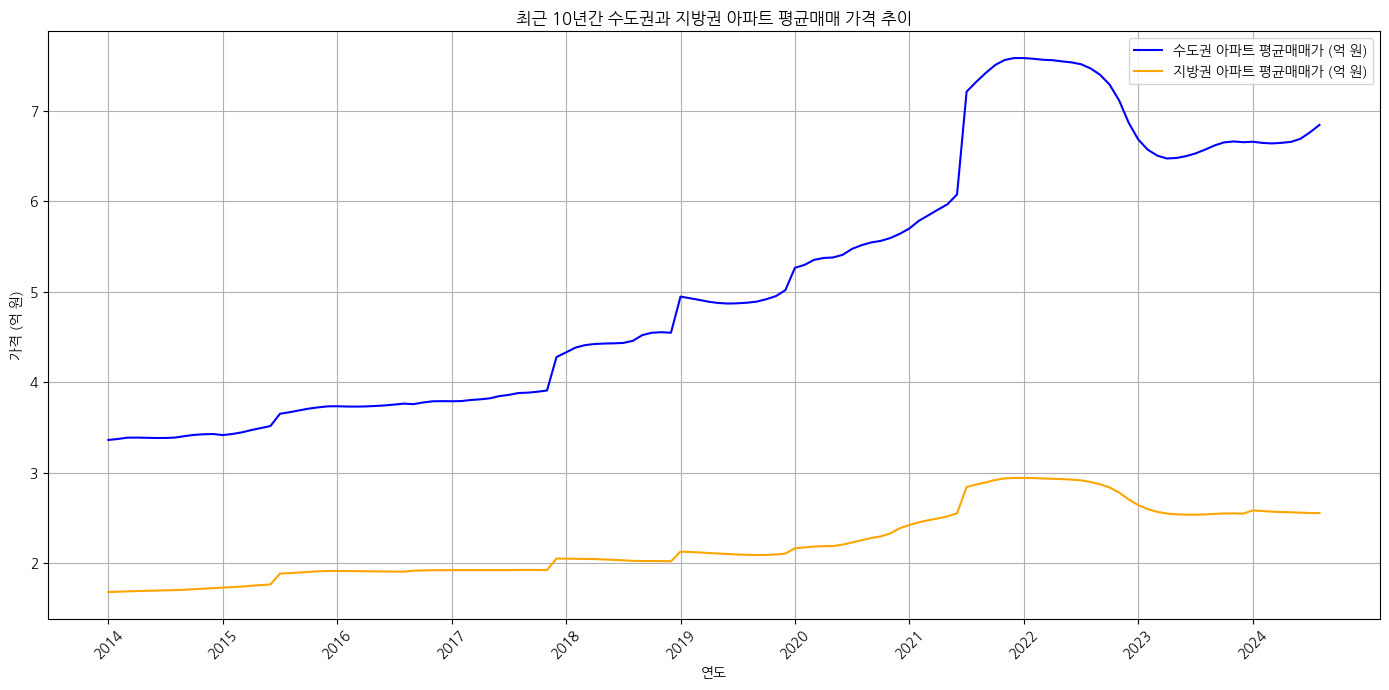

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 각 df의 PRICE 값을 1억으로 나눈 값
capital_prices = capital_df['PRICE'] / 1e8
non_capital_prices = non_capital_df['PRICE'] / 1e8

# X축은 모든 PRICE의 인덱스 생성
x_capital = np.arange(len(capital_prices))  # 0부터 127까지
x_non_capital = np.arange(len(non_capital_prices))  # 0부터 127까지

# 그래프 설정
plt.figure(figsize=(14, 7))

# 수도권 PRICE 그래프 추가
plt.plot(x_capital, capital_prices, label='수도권 아파트 평균매매가 (억 원)', color='blue')

# 지방권 PRICE 그래프 추가
plt.plot(x_non_capital, non_capital_prices, label='지방권 아파트 평균매매가 (억 원)', color='orange')

# X축 레이블 설정 (연도)
plt.xticks(ticks=np.arange(0, 128, 12), labels=capital_df['YEAR'].unique(), rotation=45)  # 각 연도에 맞춰 설정

# 그래프 레이블 및 제목 설정
plt.title('최근 10년간 수도권과 지방권 아파트 평균매매 가격 추이')
plt.xlabel('연도')
plt.ylabel('가격 (억 원)')
plt.legend()
plt.grid()

# 그래프 표시
plt.tight_layout()
plt.show()


### 처음 값, 마지막 값, 최댓 값 그래프에 나타내기

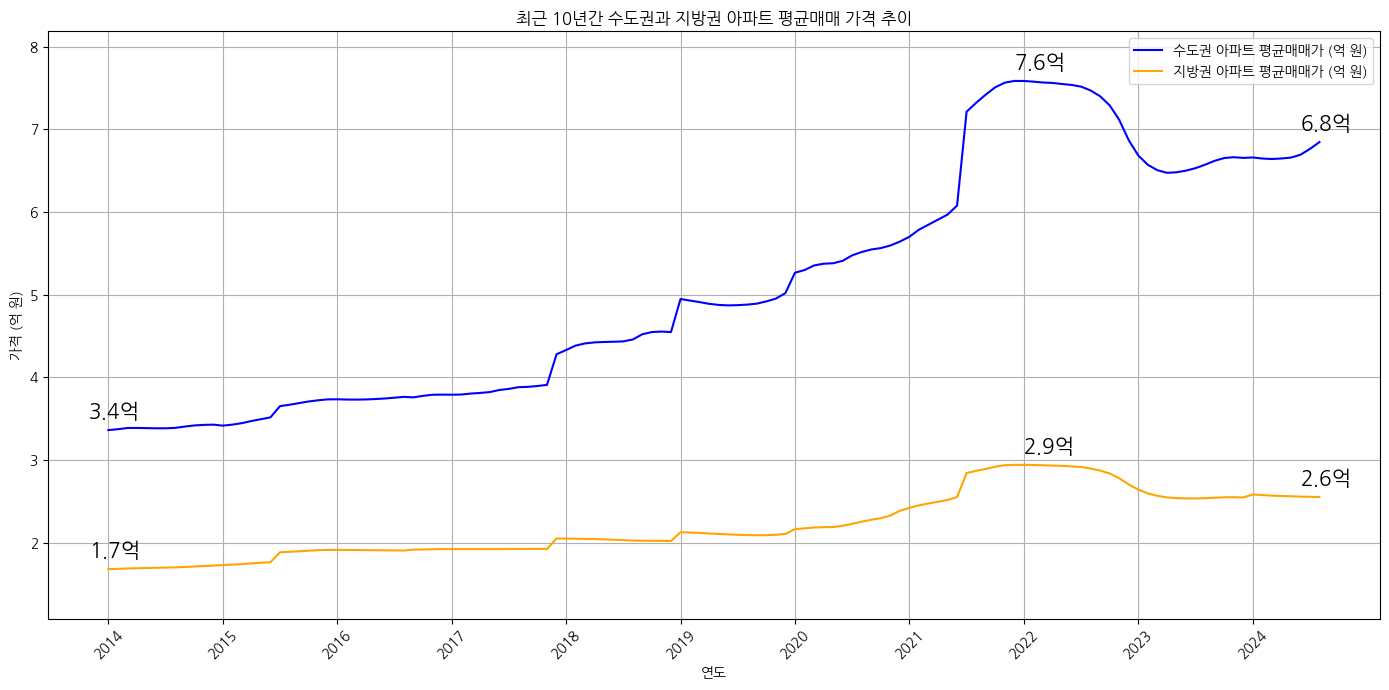

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 각 df의 PRICE 값을 1억으로 나눈 값
capital_prices = capital_df['PRICE'] / 1e8
non_capital_prices = non_capital_df['PRICE'] / 1e8

# X축은 모든 PRICE의 인덱스 생성
x_capital = np.arange(len(capital_prices))  # 0부터 127까지
x_non_capital = np.arange(len(non_capital_prices))  # 0부터 127까지

# 그래프 설정
plt.figure(figsize=(14, 7))

# 수도권 PRICE 그래프 추가
plt.plot(x_capital, capital_prices, label='수도권 아파트 평균매매가 (억 원)', color='blue')

# 지방권 PRICE 그래프 추가
plt.plot(x_non_capital, non_capital_prices, label='지방권 아파트 평균매매가 (억 원)', color='orange')

# X축 레이블 설정 (연도)
plt.xticks(ticks=np.arange(0, 128, 12), labels=capital_df['YEAR'].unique(), rotation=45)  # 각 연도에 맞춰 설정

# 그래프 레이블 및 제목 설정
plt.title('최근 10년간 수도권과 지방권 아파트 평균매매 가격 추이')
plt.xlabel('연도')
plt.ylabel('가격 (억 원)')

# y축 범위 설정 (상하 여유 추가)
plt.ylim([min(min(capital_prices), min(non_capital_prices)) - 0.6,
           max(max(capital_prices), max(non_capital_prices)) + 0.6])
plt.legend()
plt.grid()

# 텍스트 추가: 처음 값, 마지막 값 표시
# 수도권 그래프의 처음과 마지막 값
plt.text(-2, capital_prices.iloc[0] + 0.1, f'{capital_prices.iloc[0]:.1f}억', fontsize=15, color='black', verticalalignment='bottom')
plt.text(len(capital_prices) - 3, capital_prices.iloc[-1] + 0.1, f'{capital_prices.iloc[-1]:.1f}억', fontsize=15, color='black', verticalalignment='bottom')

# 지방권 그래프의 처음과 마지막 값
plt.text(-2, non_capital_prices.iloc[0] + 0.1, f'{non_capital_prices.iloc[0]:.1f}억', fontsize=15, color='black', verticalalignment='bottom')
plt.text(len(non_capital_prices) - 3, non_capital_prices.iloc[-1] + 0.1, f'{non_capital_prices.iloc[-1]:.1f}억', fontsize=15, color='black', verticalalignment='bottom')

# 수도권 그래프의 최대값 위치에 텍스트 추가
max_capital_index = np.argmax(capital_prices)
plt.text(max_capital_index, capital_prices.iloc[max_capital_index] + 0.1,
         f'{capital_prices.iloc[max_capital_index]:.1f}억', fontsize=15, color='black', verticalalignment='bottom')

# 지방권 그래프의 최대값 위치에 텍스트 추가
max_non_capital_index = np.argmax(non_capital_prices)
plt.text(max_non_capital_index, non_capital_prices.iloc[max_non_capital_index] + 0.1,
         f'{non_capital_prices.iloc[max_non_capital_index]:.1f}억', fontsize=15, color='black', verticalalignment='bottom')

# 그래프 표시
plt.tight_layout()
plt.show()
